1. Bibliothèques importées avec succès.

2. Données chargées. Taille du dataset : (178, 14)
   Cible : classes de vin (0,1,2 = 3 cépages différents)

3. Introduction artificielle de valeurs manquantes (NaN)...
   Nombre total de valeurs manquantes générées : 117

4. Nettoyage des données...

   Imputation terminée (les NaN ont été remplacés par la moyenne).
   Valeurs manquantes restantes : 0

5. Analyse Exploratoire (EDA)...

   Statistiques descriptives (5 premières features) :
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium
count  178.000000   178.00000  178.000000         178.000000  178.000000
mean    12.993609     2.35929    2.365148          19.526036   99.639053
std      0.784946     1.09628    0.270697           3.238980   13.743202
min     11.030000     0.74000    1.360000          10.600000   78.000000
25%     12.370000     1.63000    2.230000          17.425000   88.250000
50%     12.993609     1.91000    2.365148          19.513018   98.000000
75% 

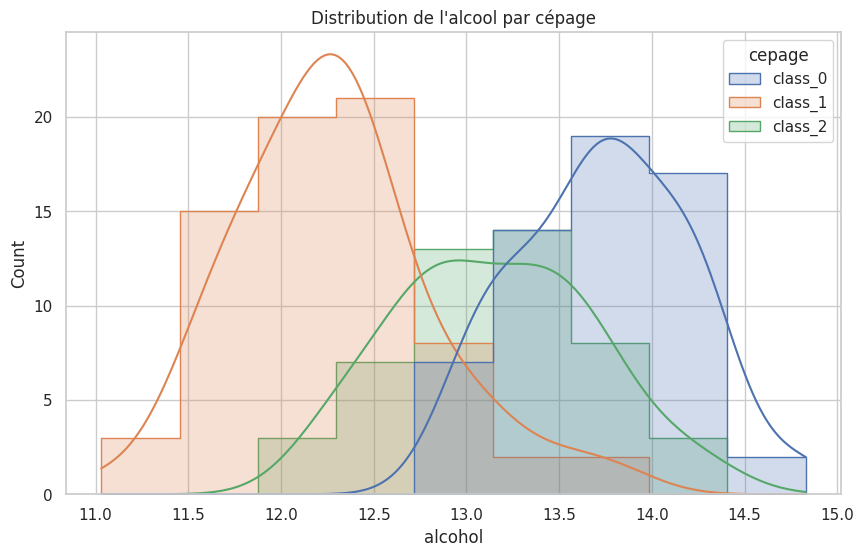

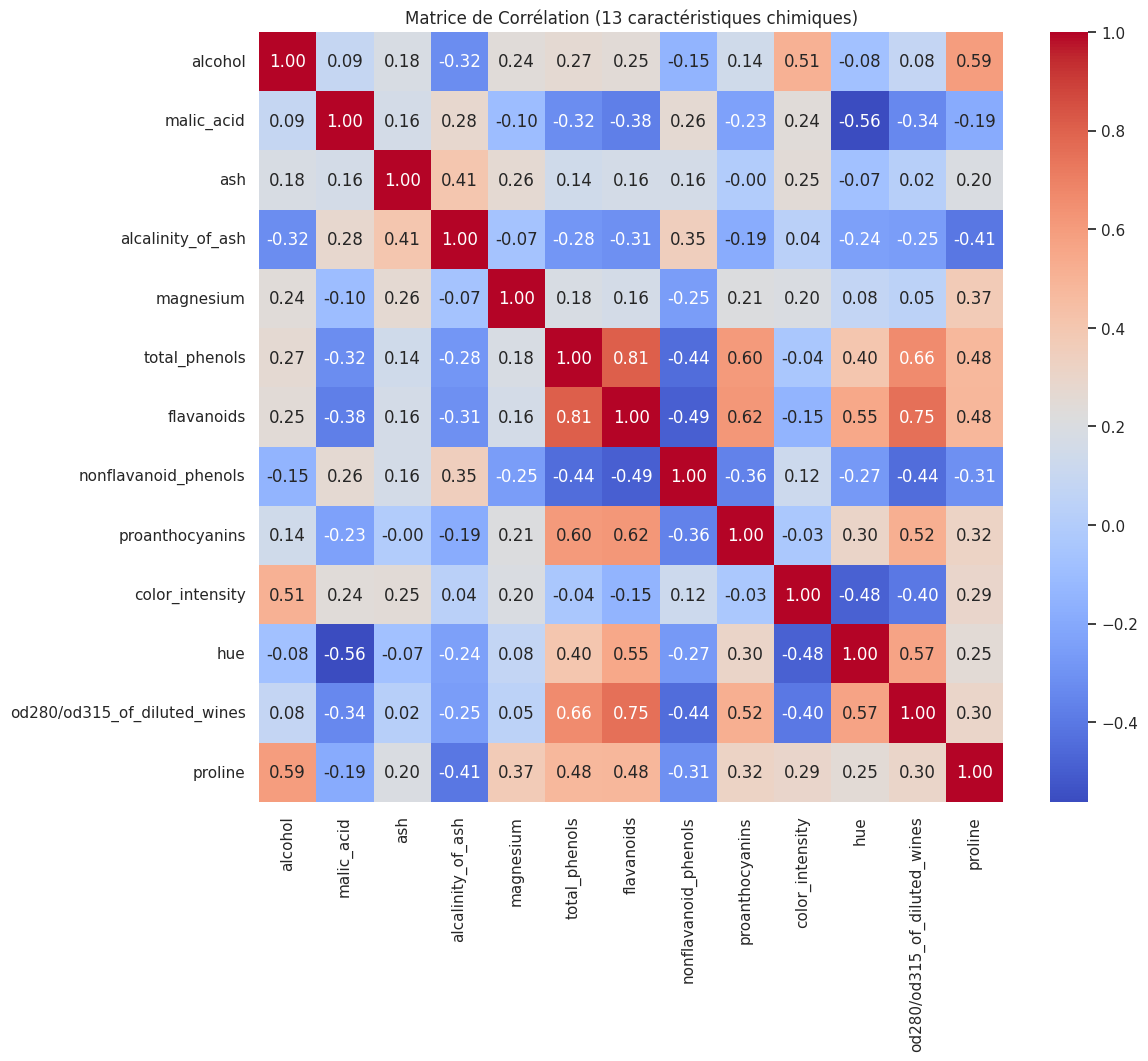

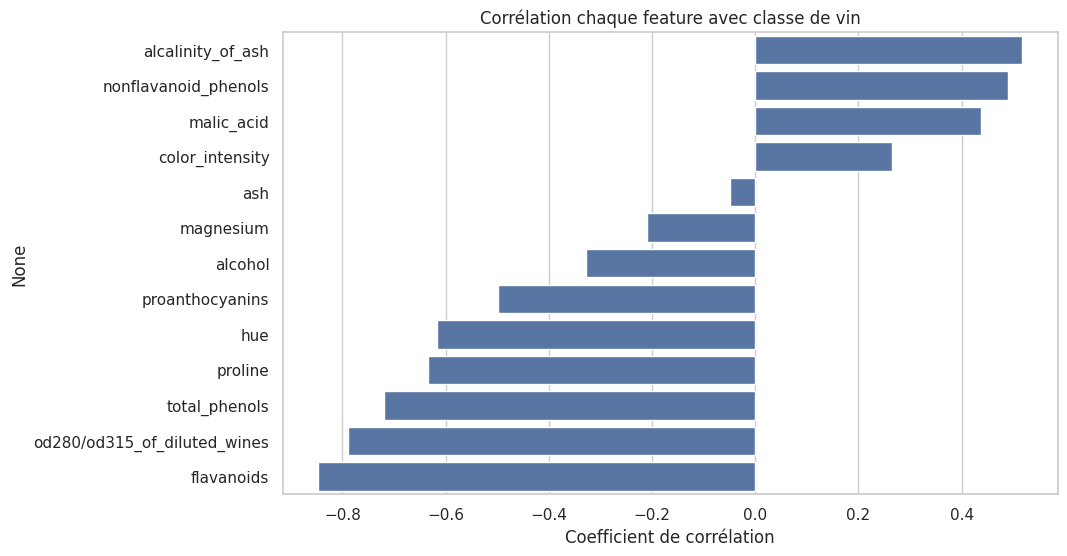

6. Séparation effectuée :
   Entraînement : 142 échantillons
   Test        : 36 échantillons

7. Entraînement du modèle (Random Forest Regressor)...

   Modèle entraîné avec succès.

8. Évaluation des performances...

   >>> Mean Squared Error (MSE)     : 0.0447
   >>> Root Mean Squared Error (RMSE): 0.2115
   >>> R-squared (R²) Score         : 0.9233



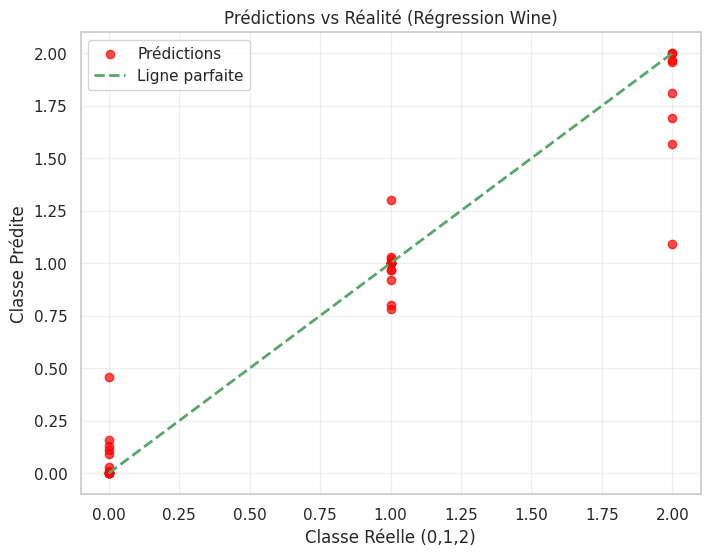


--- FIN DU SCRIPT ---


In [4]:
# ==============================================================================
# COURS DATA SCIENCE : CYCLE DE VIE COMPLET (SCRIPT PÉDAGOGIQUE - WINE RÉGRESSION)
# Auteur : Votre Professeur IA
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("1. Bibliothèques importées avec succès.\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES
# ------------------------------------------------------------------------------
data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Classes 0,1,2 (3 cépages)

print(f"2. Données chargées. Taille du dataset : {df.shape}")
print("   Cible : classes de vin (0,1,2 = 3 cépages différents)\n")

# ------------------------------------------------------------------------------
# 3. SIMULATION DE "DONNÉES SALES"
# ------------------------------------------------------------------------------
print("3. Introduction artificielle de valeurs manquantes (NaN)...")

np.random.seed(42)
df_dirty = df.copy()
features_columns = df.columns[:-1]

for col in features_columns:
    df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan

print(f"   Nombre total de valeurs manquantes générées : {df_dirty.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 4. NETTOYAGE ET PRÉPARATION
# ------------------------------------------------------------------------------
print("4. Nettoyage des données...\n")

X = df_dirty.drop('target', axis=1)
y = df_dirty['target']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_clean = pd.DataFrame(X_imputed, columns=X.columns)

print("   Imputation terminée (les NaN ont été remplacés par la moyenne).")
print(f"   Valeurs manquantes restantes : {X_clean.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 5. ANALYSE EXPLORATOIRE (EDA)
# ------------------------------------------------------------------------------
print("5. Analyse Exploratoire (EDA)...\n")

print("   Statistiques descriptives (5 premières features) :")
print(X_clean.iloc[:, :5].describe(), "\n")

# Distribution alcool par classe de vin
plt.figure(figsize=(10, 6))
sns.histplot(data=df.assign(cepage=[data.target_names[i] for i in data.target]),
             x='alcohol', hue='cepage', kde=True, element='step')
plt.title("Distribution de l'alcool par cépage")
plt.show()

# Heatmap corrélation (13 features chimiques)
plt.figure(figsize=(12, 10))
correlation_matrix = X_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (13 caractéristiques chimiques)")
plt.show()

# Corrélation features vs target
plt.figure(figsize=(10, 6))
correlations = df.corr()['target'].sort_values(ascending=False)
sns.barplot(x=correlations.values[1:], y=correlations.index[1:])
plt.title("Corrélation chaque feature avec classe de vin")
plt.xlabel("Coefficient de corrélation")
plt.show()

# ------------------------------------------------------------------------------
# 6. SÉPARATION TRAIN/TEST
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

print("6. Séparation effectuée :")
print(f"   Entraînement : {X_train.shape[0]} échantillons")
print(f"   Test        : {X_test.shape[0]} échantillons\n")

# ------------------------------------------------------------------------------
# 7. MODÉLISATION (RÉGRESSION)
# ------------------------------------------------------------------------------
print("7. Entraînement du modèle (Random Forest Regressor)...\n")

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("   Modèle entraîné avec succès.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION (RÉGRESSION)
# ------------------------------------------------------------------------------
print("8. Évaluation des performances...\n")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"   >>> Mean Squared Error (MSE)     : {mse:.4f}")
print(f"   >>> Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"   >>> R-squared (R²) Score         : {r2:.4f}\n")

# Visualisation prédictions vs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='red', label='Prédictions')
plt.plot([0, 2], [0, 2], 'g--', lw=2, label='Ligne parfaite')
plt.xlabel("Classe Réelle (0,1,2)")
plt.ylabel("Classe Prédite")
plt.title("Prédictions vs Réalité (Régression Wine)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n--- FIN DU SCRIPT ---")